In [1]:
import pandas as pd
import numpy as np

temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)
temp_df = temp_df.sort_values(by=['time'])
temp = pd.DataFrame(pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h'), columns=['time'])
temp = temp.set_index('time').join(temp_df.set_index('time'), how='left')
temp = temp['T'].ffill().to_frame()
temp.index = pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h')

from sktime.forecasting.model_selection import temporal_train_test_split

temp_train, temp_test = temp.values[:-2920].reshape(1, -1)[0], temp.values[2920:].reshape(1, -1)[0]

In [ ]:
X_train = np.array([diffs_train[i:i+13] for i in range(0, 52480, 3)])
Y_train = np.array([diffs_train[i+13] for i in range(0, 52480, 3)])
X_test = np.array([diffs_test[i:i+13] for i in range(0, 2907, 3)])
Y_test = np.array([diffs_test[i+13] for i in range(0, 2907, 3)])

In [10]:
X_train = np.array([temp_train[i:i+13] for i in range(0, 52470, 3)])
Y_train = np.array([temp_train[i+13] for i in range(0, 52470, 3)])
X_test = np.array([temp_test[i:i+13] for i in range(0, 2905, 3)])
Y_test = np.array([temp_test[i+13] for i in range(0, 2905, 3)])

In [5]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 200,
                             n_jobs=-1)
regr.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [4]:
def l2_improved(y_true, y_pred, indexes):
    if len(y_pred) != len(y_true):
        print("Lenghts are not the same!")
        return 0
    hour_vars = {0:     0.831691, 
                 3:     1.450059,
                 6:	    1.757970,
                 9:	    0.475864,
                 12:    0.629008,
                 15:	0.960935,
                 18:	1.110826,
                 21:	0.783646}
    s = 0
    n = len(y_true)
    for i in range(n):
        s += (y_true[i] - y_pred[i]) ** 2 * hour_vars[indexes[i]]
    return s / n

In [35]:
regr.predict(X_test)

array([ 0.44384307,  0.86931311, -0.45232718, ..., -0.9869254 ,
       -0.02730396, -0.13373904])

In [34]:
l2_improved(regr.predict(X_test), Y_test, 0)

2.922765927357314

In [8]:
from sklearn.ensemble import RandomForestRegressor

for k in [7, 15, 23, 31, 63]:
    X_train = np.array([diffs_train[i:i+k] for i in range(0, 52492-k, 3)])
    Y_train = np.array([diffs_train[i+k] for i in range(0, 52492-k, 3)])
    X_test = np.array([diffs_test[i:i+k] for i in range(0, 2919-k, 1)])
    Y_test = np.array([diffs_test[i+k] for i in range(0, 2919-k, 1)])

    print(f"Обучение модели для k={k}...")
    regr = RandomForestRegressor(n_estimators = 100,
                             n_jobs=-1)
    regr.fit(X_train, Y_train)
    print(f"Полученная метрика: {l2_improved(regr.predict(X_test), Y_test, [(x % 8) * 3 for x in list(range(k, 2919))])}", end='\n\n')

Обучение модели для k=7...
Полученная метрика: 2.169633062054604

Обучение модели для k=15...
Полученная метрика: 2.008445261465417

Обучение модели для k=23...
Полученная метрика: 1.866653925241297

Обучение модели для k=31...
Полученная метрика: 1.8583953766294914

Обучение модели для k=63...
Полученная метрика: 1.811606830593535



In [34]:
from sklearn.ensemble import RandomForestRegressor

for k in [7, 15, 23, 31, 63]:
    X_train = np.array([temp_train[i:i+k] for i in range(0, 52492-k, 3)])
    Y_train = np.array([temp_train[i+k] for i in range(0, 52492-k, 3)])
    X_test = np.array([temp_test[i:i+k] for i in range(0, 2919-k, 1)])
    Y_test = np.array([temp_test[i+k] for i in range(0, 2919-k, 1)])

    print(f"Обучение модели для k={k}...")
    regr = RandomForestRegressor(n_estimators = 100,
                             n_jobs=-1)
    regr.fit(X_train, Y_train)
    print(f"Полученная метрика: {l2_improved(regr.predict(X_test), Y_test, [(x % 8) * 3 for x in list(range(k, 2919))])}", end='\n\n')

Обучение модели для k=7...
Полученная метрика: 1.4897494007454213

Обучение модели для k=15...
Полученная метрика: 1.4220135488014893

Обучение модели для k=23...
Полученная метрика: 1.4407572058829818

Обучение модели для k=31...
Полученная метрика: 1.3638986840905905

Обучение модели для k=63...
Полученная метрика: 1.4040497626652864



In [22]:
from sklearn.ensemble import RandomForestRegressor

k = 63

X_train = np.array([temp_train[i:i+k] for i in range(0, 52450-k, 3)])
Y_train = np.array([temp_train[i+k] for i in range(0, 52450-k, 3)])
X_test = np.array([temp_test[i:i+k] for i in range(0, 2890-k, 1)])
Y_test = np.array([temp_test[i+k] for i in range(0, 2890-k, 1)])

print(f"Обучение модели для k={k}...")
regr = RandomForestRegressor(n_estimators = 100,
                             n_jobs=-1)
regr.fit(X_train, Y_train)
errors = []

for j in range(24):
    result = regr.predict(X_test)
    errors.append(l2_improved(result, Y_test, [((x + j) % 8) * 3 for x in list(range(k, 2890))]))

    X_test = np.concatenate((X_test[:,1:], result.reshape(-1, 1)), axis=1)
    Y_test = np.array([temp_test[i+k] for i in range(j + 1, 2891+j-k, 1)])


Обучение модели для k=63...


In [23]:
errors_arima = [1.862907222096411, 4.424925487097953, 6.436627601433177, 7.405172793601098, 8.332460850046445, 9.466833389731445, 10.086774185975434, 11.0646048233372, 12.765727276350695, 13.802935613158311, 14.871201778611576, 17.204787688458286, 15.905333775255912, 14.596329269426654, 16.922311070384573, 17.939479725877447, 18.710771979574698, 19.049783489150602, 20.3490707482319, 21.738321156525174, 21.88993694861669, 19.5661680570079, 20.848078936098002, 23.42435437251674]
errors_naive = [2.0729607417065, 5.3283726912336995, 9.003354576144131, 11.87773047762036, 12.491335390093528, 11.90806890175647, 11.195371264746743, 11.578859456811934, 13.221574711246907, 15.590722312244337, 18.480139376878668, 20.821205544301108, 21.298703648017185, 20.711930552000748, 20.067855392179, 20.36338450422059, 21.47951103685482, 23.211448924803417, 25.59060323098055, 27.627638753426535, 27.696395495642502, 26.89804339773496, 25.969931973050734, 26.01736191143179]

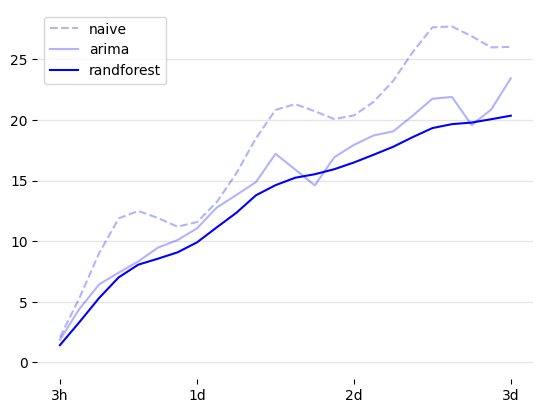

In [25]:
import matplotlib.pyplot as plt

x_values = list(range(24))
names=['3h','6h','               ','12h','              ','18h','             ','1d','            ','           ','          ','1d12h','         ','        ','       ','2d', ' ','  ','   ','2d12h','    ','     ','      ','3d']

plt.box(False)
for h in [0, 5, 10, 15, 20, 25]:
    plt.axhline(y=h, color='black', alpha=0.1, lw=1)

plt.plot(x_values, errors_naive, color="blue", alpha=0.3, label="naive", ls="--")
plt.plot(x_values, errors_arima, color="blue", alpha=0.3, label="arima")
plt.plot(x_values, errors, color="blue",label="randforest")
plt.xticks(x_values, names)
plt.xticks([0,7,15,23])
plt.legend()
plt.show()